4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston
Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset
contains information about various houses in Boston through different parameters. There
are 506 samples and 14 feature variables in this dataset. 

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
# Step 2: Load the housing dataset
housing_data = pd.read_csv('housing.csv')

In [23]:
# Step 3: Display first few rows
print(housing_data.head())

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [24]:
# Step 4: Check for missing values
print("\nMissing Values:\n", housing_data.isnull().sum())


Missing Values:
 RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [26]:
# Step 5: Define independent (X) and dependent (y) variables
X = housing_data.drop(['MEDV'], axis=1)
y = housing_data['MEDV']

In [27]:
# Step 6: Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 7: Create a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
# Step 8: Train the model
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Step 9: Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [31]:
# Step 10: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Training set evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [35]:
# Testing set evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [36]:
print("\nTraining MSE:", train_mse)


Training MSE: 7949715203.592581


In [37]:
print("Training R² Score:", train_r2)

Training R² Score: 0.7194530968926247


In [38]:
print("\nTesting MSE:", test_mse)


Testing MSE: 6789025559.26589


In [39]:
print("Testing R² Score:", test_r2)

Testing R² Score: 0.6910934003098511


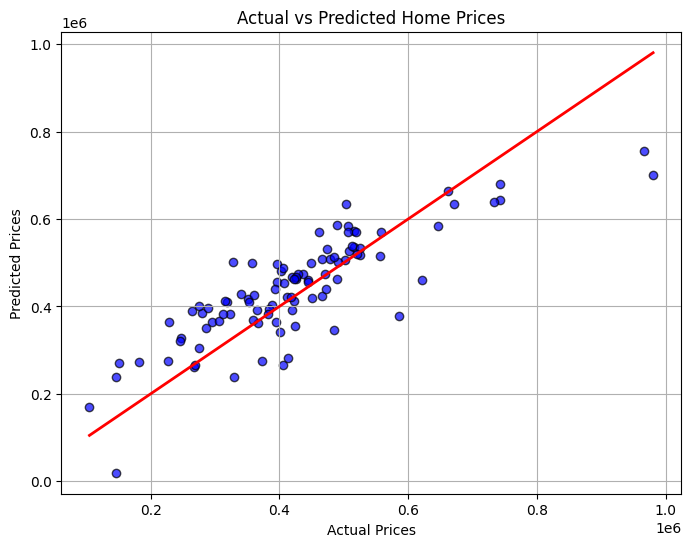

In [40]:
# Step 11: Plotting True vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()

Awesome — you want **even deeper**, **fuller**, **more professional detail**,  
almost like a **real practical manual plus viva preparation notes**.  
Let's go ALL IN 🔥 — I'll expand *every step*, *add internal workings*, *mathematical reasons*, and *possible viva follow-up questions*. 

---

# 📚 Ultimate Detailed Theory (Functionality-Wise, Viva-Ready)

---

## 1. Import Libraries

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```

**Purpose:**  
- `numpy` provides support for large multi-dimensional arrays and matrices and mathematical operations.
- `pandas` is used for data manipulation and analysis. It provides DataFrames (tables) to structure data properly.
- `matplotlib.pyplot` is used for creating visualizations like line plots, scatter plots, histograms, etc.

**Why Used:**  
Every machine learning project requires:
- **Data handling** → Pandas  
- **Math calculations** → NumPy  
- **Plotting results** → Matplotlib

---
**Possible Viva Questions:**
- Why use pandas instead of plain lists?  
  *(Pandas offer built-in functions for handling missing values, grouping, merging, etc.)*
- Why matplotlib when seaborn also exists?  
  *(Matplotlib is a low-level library offering more control.)*

---

## 2. Load the Dataset

```python
housing_data = pd.read_csv('housing.csv')
```

**Purpose:**  
- Loads external CSV file into a structured format (DataFrame).

**Why Used:**  
Without reading data into memory, we cannot proceed with analysis or model training.

---
**Possible Viva Questions:**
- What is a DataFrame?  
  *(A 2-dimensional labeled data structure with columns of potentially different types.)*
- What happens if the file path is wrong?  
  *(It raises a FileNotFoundError.)*

---

## 3. View Dataset

```python
housing_data.head()
```

**Purpose:**  
- Displays the first 5 records by default.
  
**Why Used:**  
- Ensures dataset is correctly loaded.
- Checks what columns are present.

---
**Possible Viva Questions:**
- How many rows does `head()` show by default?  
  *(Five rows.)*

---

## 4. Check Missing Values

```python
housing_data.isnull().sum()
```

**Purpose:**  
- Detects missing values column-wise.

**Why Used:**  
- Missing values cause errors during model training and reduce accuracy.

---
**Possible Viva Questions:**
- How to deal with missing values if they exist?  
  *(Either fill with mean/median or remove rows.)*

---

## 5. Define Features and Target Variable

```python
X = housing_data.drop(['MEDV'], axis=1)
y = housing_data['MEDV']
```

**Purpose:**  
- `X` holds independent variables (inputs).
- `y` holds the dependent variable (output to predict).

**Why Used:**  
- Machine learning requires clearly separating **input (X)** and **output (y)** for training.

---
**Possible Viva Questions:**
- What happens if you don’t separate X and y?  
  *(Model training fails or gives wrong results.)*

---

## 6. Split into Train and Test Sets

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

**Purpose:**  
- Divides data into 80% training and 20% testing sets.

**Why Used:**  
- To evaluate how the model generalizes to unseen data.
- Prevents **overfitting** (model performing well on training but poorly on real-world data).

---
**Possible Viva Questions:**
- Why do we split data?
  *(To test model performance on unseen data.)*
- Why `random_state=42`?
  *(For reproducibility: ensures consistent random splits.)*

---

## 7. Create Linear Regression Model

```python
model = LinearRegression()
```

**Purpose:**  
- Instantiates a Linear Regression model.

**Why Used:**  
- We want to predict a continuous output (house prices), and Linear Regression is a fundamental method for that.

---
**Possible Viva Questions:**
- What is Linear Regression?  
  *(A method to model the relationship between a dependent variable and one/multiple independent variables by fitting a straight line.)*

---

## 8. Train the Model

```python
model.fit(X_train, y_train)
```

**Purpose:**  
- Fits the model to the training data — finds the best-fit line equation:  
  **y = b0 + b1*x1 + b2*x2 + ... + bn*xn**

**Why Used:**  
- Model **learns** the pattern or relationship between features and target.

---
**Possible Viva Questions:**
- What happens internally when you call `fit()`?
  *(Calculates coefficients (weights) minimizing the residual sum of squares.)*

---

## 9. Predict Train and Test Data

```python
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
```

**Purpose:**  
- Predicts the house prices using trained model for both training and testing datasets.

**Why Used:**  
- We need to compare **predicted** values with **actual** values to assess model accuracy.

---
**Possible Viva Questions:**
- Why predict on both training and testing?
  *(Training prediction helps detect underfitting; Testing prediction helps detect overfitting.)*

---

## 10. Evaluate the Model

```python
mean_squared_error(y_train, y_train_pred)
r2_score(y_train, y_train_pred)
mean_squared_error(y_test, y_test_pred)
r2_score(y_test, y_test_pred)
```

**Purpose:**  
- `mean_squared_error`: measures average of squares of errors (penalizes larger errors).
- `r2_score`: measures how much variance in target is explained by model.

**Why Used:**  
- Quantitative measures needed to check how well model performs numerically.

---
**Possible Viva Questions:**
- Why prefer R² score?  
  *(R² explains goodness of fit — closer to 1 is better.)*
- What does negative R² mean?  
  *(Model is performing worse than simply predicting mean.)*

---

## 11. Plot Actual vs Predicted

```python
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
```

**Purpose:**  
- Scatter plot shows the relationship between true values and predicted values.
- Red line shows perfect prediction line (ideal model).

**Why Used:**  
- Visualization helps understand bias, variance, and any systematic errors.

---
**Possible Viva Questions:**
- What would a perfect scatter plot look like?
  *(All points lying exactly on the red line.)*
- What if points are widely scattered?
  *(Poor predictions; high error.)*

---

## 12. Label Plot

```python
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()
```

**Purpose:**  
- Adds labels, title, and displays the plot.

**Why Used:**  
- Good labeling is critical for communicating findings.

---
**Possible Viva Questions:**
- Why label graphs in Data Science?
  *(To clearly communicate what is being shown and avoid misinterpretation.)*

---


